<a href="https://colab.research.google.com/github/Asatheesh6561/SARIMAX-GARCH/blob/main/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels

In [ ]:
pip install arch

     |████████████████████████████████| 902 kB 3.8 MB/s 
     |████████████████████████████████| 9.8 MB 51.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
from arch import arch_model
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('train_dataframes.xlsx', parse_dates=['datetime'], index_col='datetime', sheet_name=0)
data

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
datetime,,,,,,,,,,,
2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-09 20:00:00,1362.1477,1376.6220,1335.4711,1360.112475,4,0,0,0,20,29.044763,1397.5788
2019-04-09 21:00:00,1330.7467,1338.3879,1305.3631,1332.959900,4,0,0,0,21,28.539545,1350.5093
2019-04-09 22:00:00,1275.5550,1281.6932,1240.1208,1279.486450,4,0,0,0,22,28.163232,1308.7955


In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
d = {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False, seasonality=True)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            d[(param, param_seasonal)] = results.aic
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1602.664532172337
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1381.3223484756493
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:757.2744366540206
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:714.8464434874355
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:860.1118278567079
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:817.9160755101017
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:691.4796075702606
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:652.9104996161368
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1392.7126407984165
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1179.7261394997604
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:699.0755278556753
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:681.2633953035668
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:792.7594821833868
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:776.1471438307349
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:674.3248522796207
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:643.128731999748
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:905.1397808427533
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:776.5634205802294
ARIMA(0,

In [ ]:
print(d[min(d, key=lambda a:d[a])])

525.634351464859


In [ ]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False, seasonality=True)
results = mod.fit()
garch_model = arch_model(results.resid, p=1, q=1)
garch_fitted = garch_model.fit()

# print(results.summary().tables[1])
print(garch_fitted, results)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 225.9630576798655
Iteration:      2,   Func. Count:     17,   Neg. LLF: 225.63261206257414
Iteration:      3,   Func. Count:     26,   Neg. LLF: 225.57136192957543
Iteration:      4,   Func. Count:     33,   Neg. LLF: 225.33309360534656
Iteration:      5,   Func. Count:     40,   Neg. LLF: 224.9455785328758
Iteration:      6,   Func. Count:     47,   Neg. LLF: 224.6697051836671
Iteration:      7,   Func. Count:     53,   Neg. LLF: 224.5515220450373
Iteration:      8,   Func. Count:     60,   Neg. LLF: 224.54838610097397
Iteration:      9,   Func. Count:     67,   Neg. LLF: 224.53104434078736
Iteration:     10,   Func. Count:     73,   Neg. LLF: 224.52989201610322
Iteration:     11,   Func. Count:     79,   Neg. LLF: 224.5298714318803
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 224.52987149011315
            Iterations: 11
            Function evaluations: 79
            Gradient evaluat

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -258.817
Date:                            Mon, 21 Feb 2022   AIC                            525.634
Time:                                    21:34:14   BIC                            538.643
Sample:                                07-01-1991   HQIC                           530.904
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2504      0.051     -4.922      0.000      -0.350      -0.151
ma.L1         -0.6674      0.049    -13.615      0.000      -0.763      -0.571
ma.S.L12      -0.4725      0.057     -8.236      0.000      -0.585      -0.360
sigma2         0.8618      0.049     17.707      0.000       0.766       0.957
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               203.98
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              15.99   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

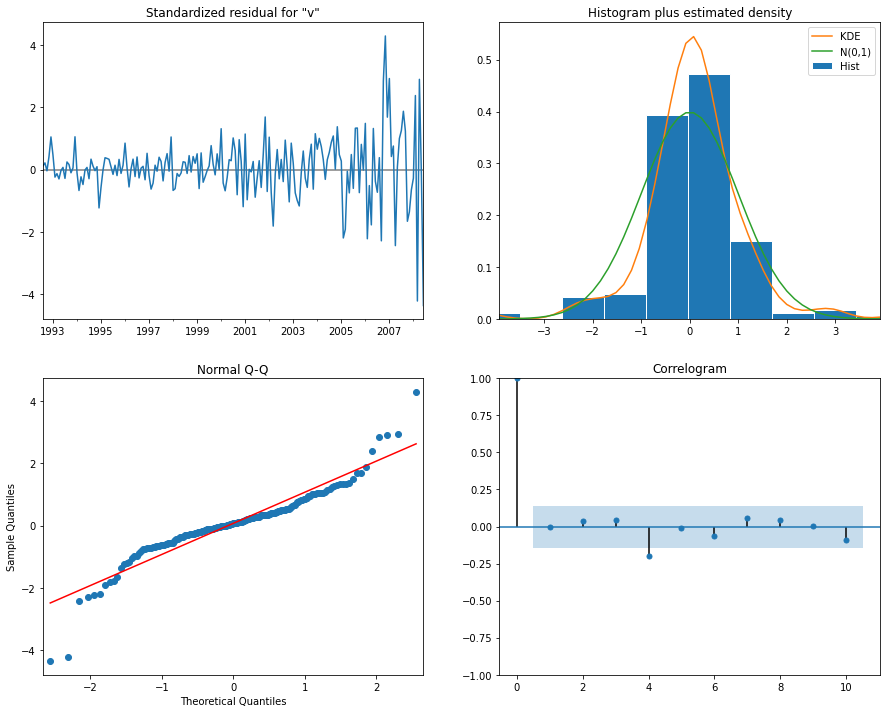

0.627718713915361
[3.526591, 0.3456978753680331, 0.07132905139898726, 0.35878232348885586, 0.04513364865664293, 0.7405018574326978, 0.7819649287421528, 2.2738142935479937, 0.17128809598331118, 0.21896988307042742, 0.07720175539685847, 0.14294403947322243, 1.2959679685717558, 0.16662162554035964, 0.2473894092432558, 0.03829630899896008, 0.43048989434523266, 1.0889200885616441, 0.48754077431684273, 0.2441307649049551, 0.12988422589088255, 0.30399890585828127, 0.02650802527843643, 0.07631745174322369, 0.27370608015995934, 0.24256729438704294, 0.16053709850056386, 0.0940572294526838, 0.05522956971935766, 1.0028588599023376, 0.0848561535885235, 0.6326346635481759, 0.2155135910530923, 0.4502081159387519, 0.009989270426436825, 0.07015545537155976, 0.2715100963186794, 0.3175960207865973, 0.10845172579636575, 0.02838514755601551, 0.0899907959767896, 1.1450501320711997, 0.5268262951140024, 0.007539129812516698, 0.3585651752766976, 0.3378667644458986, 0.3117448468461914, 0.09146486947708254, 0.14

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()
residuals = [abs(i) for i in results.resid]
print(sum(residuals)/len(residuals))
print(residuals)

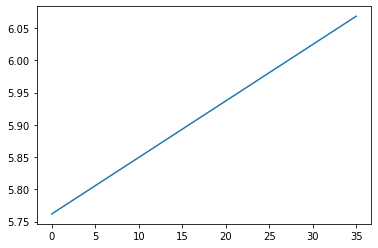

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2003-01-01'), dynamic=False)
pred_ci = pred.conf_int()
garch_forecast = garch_fitted.forecast(horizon = 36)
plt.plot(garch_forecast.variance.values[-1, :])
plt.show()


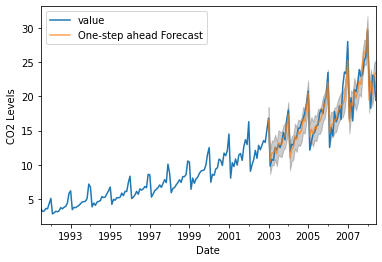

In [ ]:
ax = data.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [ ]:
y_forecasted = list(pred.predicted_mean)
y_truth = list(data['2003-01-01':]['value'])
APE = []
for i in range(len(y_forecasted)):
  per_err = abs((y_truth[i] - y_forecasted[i]) / y_truth[i])
  APE.append(per_err)
MAPE = sum(APE)/len(APE)
print(MAPE)

0.06073209569537392


In [ ]:
print(data['1991-01-01':], residuals)
print(y_forecasted)
print(y_truth)
print(len(residuals))
print(len(data))

                value
date                 
1991-07-01   3.526591
1991-08-01   3.180891
1991-09-01   3.252221
1991-10-01   3.611003
1991-11-01   3.565869
...               ...
2008-02-01  21.654285
2008-03-01  18.264945
2008-04-01  23.107677
2008-05-01  22.912510
2008-06-01  19.431740

[204 rows x 1 columns] [3.526591, 0.3456978753680331, 0.07132905139898726, 0.35878232348885586, 0.04513364865664293, 0.7405018574326978, 0.7819649287421528, 2.2738142935479937, 0.17128809598331118, 0.21896988307042742, 0.07720175539685847, 0.14294403947322243, 1.2959679685717558, 0.16662162554035964, 0.2473894092432558, 0.03829630899896008, 0.43048989434523266, 1.0889200885616441, 0.48754077431684273, 0.2441307649049551, 0.12988422589088255, 0.30399890585828127, 0.02650802527843643, 0.07631745174322369, 0.27370608015995934, 0.24256729438704294, 0.16053709850056386, 0.0940572294526838, 0.05522956971935766, 1.0028588599023376, 0.0848561535885235, 0.6326346635481759, 0.2155135910530923, 0.4502081159387519, 

In [ ]:
print(list(data.index))
resid = (pd.DataFrame(residuals, columns = ['residual'], index=data.index))
print(resid)

[Timestamp('1991-07-01 00:00:00'), Timestamp('1991-08-01 00:00:00'), Timestamp('1991-09-01 00:00:00'), Timestamp('1991-10-01 00:00:00'), Timestamp('1991-11-01 00:00:00'), Timestamp('1991-12-01 00:00:00'), Timestamp('1992-01-01 00:00:00'), Timestamp('1992-02-01 00:00:00'), Timestamp('1992-03-01 00:00:00'), Timestamp('1992-04-01 00:00:00'), Timestamp('1992-05-01 00:00:00'), Timestamp('1992-06-01 00:00:00'), Timestamp('1992-07-01 00:00:00'), Timestamp('1992-08-01 00:00:00'), Timestamp('1992-09-01 00:00:00'), Timestamp('1992-10-01 00:00:00'), Timestamp('1992-11-01 00:00:00'), Timestamp('1992-12-01 00:00:00'), Timestamp('1993-01-01 00:00:00'), Timestamp('1993-02-01 00:00:00'), Timestamp('1993-03-01 00:00:00'), Timestamp('1993-04-01 00:00:00'), Timestamp('1993-05-01 00:00:00'), Timestamp('1993-06-01 00:00:00'), Timestamp('1993-07-01 00:00:00'), Timestamp('1993-08-01 00:00:00'), Timestamp('1993-09-01 00:00:00'), Timestamp('1993-10-01 00:00:00'), Timestamp('1993-11-01 00:00:00'), Timestamp('19

In [ ]:
am = arch_model(resid, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(last_obs="2003-01-01", update_freq=5)
forecasts = res.forecast(horizon=5)

Iteration:      5,   Func. Count:     40,   Neg. LLF: 61.15631208329212
Iteration:     10,   Func. Count:     73,   Neg. LLF: 61.04678277528562
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 61.04678277548352
            Iterations: 10
            Function evaluations: 73
            Gradient evaluations: 10


In [ ]:
print(forecasts.variance)

                 h.1       h.2       h.3       h.4       h.5
date                                                        
1991-07-01       NaN       NaN       NaN       NaN       NaN
1991-08-01       NaN       NaN       NaN       NaN       NaN
1991-09-01       NaN       NaN       NaN       NaN       NaN
1991-10-01       NaN       NaN       NaN       NaN       NaN
1991-11-01       NaN       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...
2008-02-01  0.584868  0.535612  0.491420  0.451774  0.416204
2008-03-01  1.266750  1.147374  1.040274  0.944187  0.857981
2008-04-01  1.400412  1.267292  1.147860  1.040710  0.944578
2008-05-01  1.184583  1.073656  0.974136  0.884851  0.804746
2008-06-01  1.827183  1.650176  1.491371  1.348897  1.221074

[204 rows x 5 columns]
